A common concern for applicants to university is ‘what are the chances of admission to a university?’
What is his probability of admission? What are the key factors? 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
admission_csv = 'C:/Users/zheng/Desktop/Data Science/Presentations/Mod 4//admission.csv'

admission = pd.read_csv(admission_csv)

# Step 1
Perform EDA.

In [3]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission = pd.read_csv(admission_csv, usecols=[1,2,3,4,5,6,7,8])

admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
admission.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Step 2
Select our Target Variable. And predictor variable.

In [7]:
Y = admission['Chance of Admit']

In [8]:
# Take all columns except target as predictor columns
predictor_columns = [c for c in admission.columns if c != 'Chance of Admit']
# Load the dataset as a pandas data frame
X = pd.DataFrame(admission, columns = predictor_columns)

In [9]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
X.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


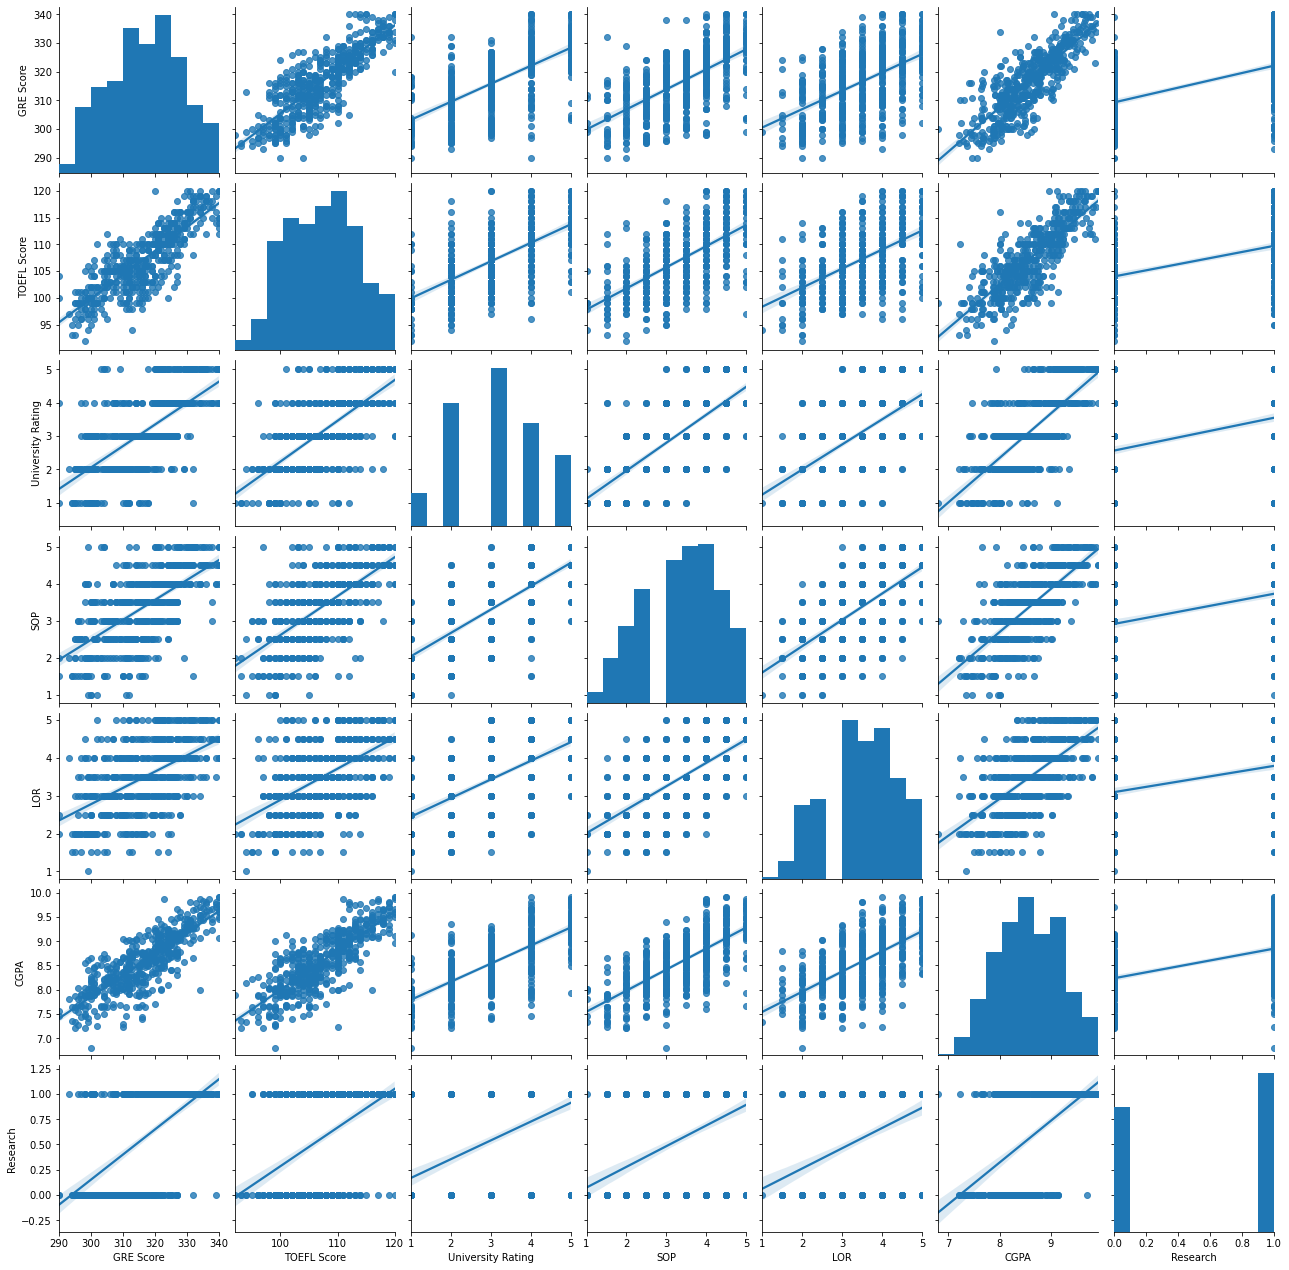

In [11]:
sns.pairplot(admission, vars=X, kind='reg')  


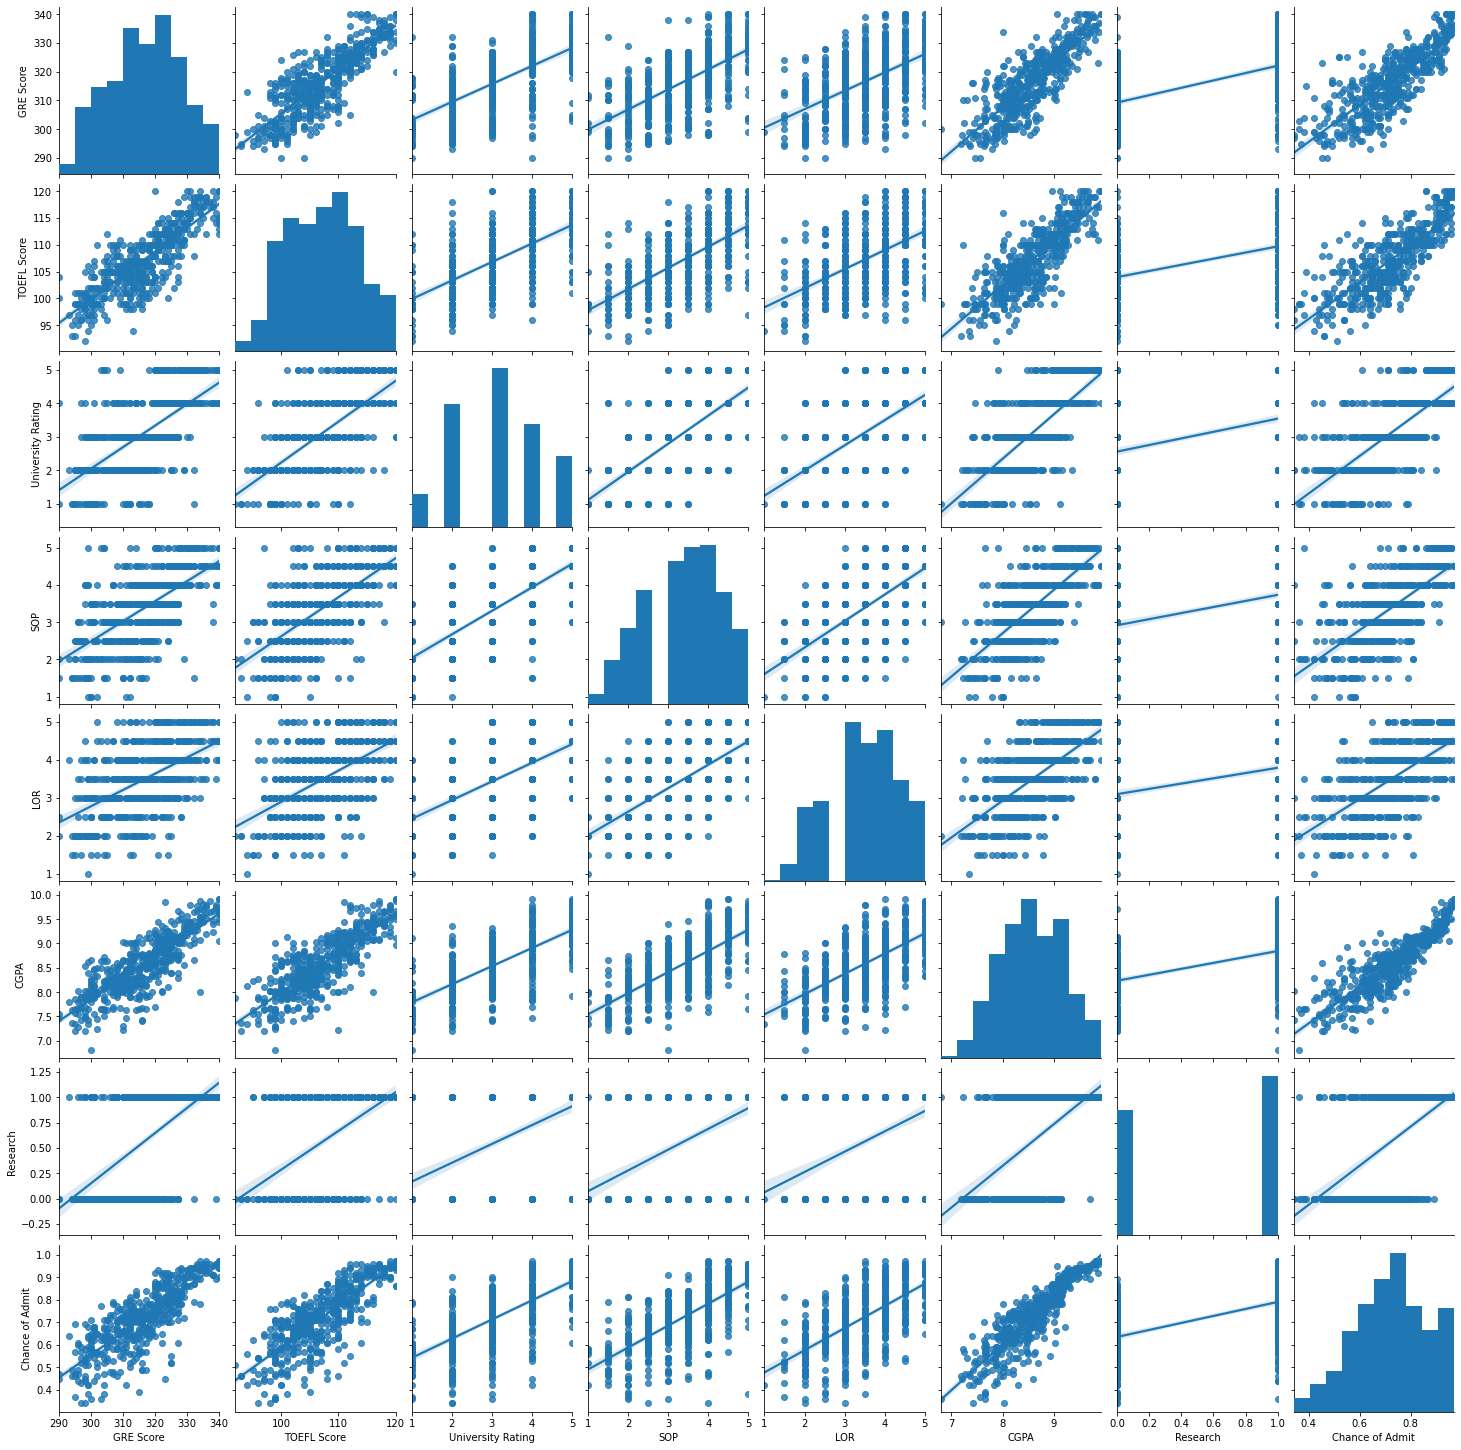

In [12]:
sns.pairplot(admission, vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit'], kind='reg')  

In [13]:
admission.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# Step 3
Feature Selection

In [14]:
admission.rename(columns= {'Chance of Admit' : 'COA', 'GRE Score': 'GRE', 'TOEFL Score' : 'TOEFL', 'University Rating' : 'Uni_Ranking'}, inplace=True)

admission.columns

Index(['GRE', 'TOEFL', 'Uni_Ranking', 'SOP', 'LOR', 'CGPA', 'Research', 'COA'], dtype='object')

In [15]:
model1 = ols('COA ~ GRE', admission).fit()
print(model1.summary())

model2 = ols('COA ~ TOEFL', admission).fit()
print(model2.summary())

model3 = ols('COA ~ Uni_Ranking', admission).fit()
print(model3.summary())

model4 = ols('COA ~ SOP', admission).fit()
print(model4.summary())

model5 = ols('COA ~ LOR', admission).fit()
print(model5.summary())

model6 = ols('COA ~ CGPA', admission).fit()
print(model6.summary())

model7 = ols('COA ~ Research', admission).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    COA   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     952.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          1.09e-117
Time:                        21:14:22   Log-Likelihood:                 537.30
No. Observations:                 500   AIC:                            -1071.
Df Residuals:                     498   BIC:                            -1062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4828      0.104    -23.896      0.0

# Step 4 
Build train?test model

In [16]:
X["const"] = 1

In [17]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,const
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [20]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], Y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = model.score(X_train[included + [new_column]], Y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - (1 - r2) * (n -1)/(n - k - 1) # calculate the Adjusted R^2
    

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
        r2_list.append(best['r2'])
        adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature CGPA with R^2 = 0.771 and adjusted R^2 = 0.769
Added feature GRE Score with R^2 = 0.800 and adjusted R^2 = 0.796
Added feature LOR  with R^2 = 0.811 and adjusted R^2 = 0.805
Added feature TOEFL Score with R^2 = 0.816 and adjusted R^2 = 0.808
Added feature Research with R^2 = 0.821 and adjusted R^2 = 0.811

Resulting features:
CGPA, GRE Score, LOR, TOEFL Score, Research


In [21]:
model8 = ols('COA ~ CGPA + GRE + TOEFL + LOR + Research', admission).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                    COA   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          9.97e-182
Time:                        21:14:22   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3357      0.099    -13.482      0.0

In [22]:
admission['CGPA_scale'] = preprocessing.scale(admission['CGPA'])
admission['GRE_scale'] = preprocessing.scale(admission['GRE'])
admission['LOR_scale'] = preprocessing.scale(admission['LOR'])
admission['TOEFL_scale'] = preprocessing.scale(admission['TOEFL'])
admission['Research_scale'] = preprocessing.scale(admission['Research'])


In [23]:
model9 = ols('COA ~ CGPA_scale + GRE_scale + TOEFL_scale + LOR_scale + Research_scale', admission).fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                    COA   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 26 Nov 2020   Prob (F-statistic):          9.97e-182
Time:                        21:14:23   Log-Likelihood:                 699.65
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7217      0.003    268.

In [24]:
admission.head()

,GRE,TOEFL,Uni_Ranking,SOP,LOR,CGPA,Research,COA,CGPA_scale,GRE_scale,LOR_scale,TOEFL_scale,Research_scale
0,337,118,4,4.5,4.5,9.65,1,0.92,1.776806,1.819238,1.098944,1.778865,0.886405
1,324,107,4,4.0,4.5,8.87,1,0.76,0.485859,0.667148,1.098944,-0.031601,0.886405
2,316,104,3,3.0,3.5,8.00,1,0.72,-0.954043,-0.041830,0.017306,-0.525364,0.886405
3,322,110,3,3.5,2.5,8.67,1,0.80,0.154847,0.489904,-1.064332,0.462163,0.886405
4,314,103,2,2.0,3.0,8.21,0,0.65,-0.606480,-0.219074,-0.523513,-0.689952,-1.128152


In [25]:
X1 = admission[['GRE', 'TOEFL', 'LOR', 'CGPA', 'Research']]


In [26]:
X1.head()

,GRE,TOEFL,LOR,CGPA,Research
0,337,118,4.5,9.65,1
1,324,107,4.5,8.87,1
2,316,104,3.5,8.00,1
3,322,110,2.5,8.67,1
4,314,103,3.0,8.21,0


In [27]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [28]:
X1_train

,GRE,TOEFL,LOR,CGPA,Research
249,321,111,4.0,8.83,1
433,316,111,5.0,8.54,0
19,303,102,3.0,8.50,0
322,314,107,4.0,8.27,0
332,308,106,2.5,8.21,1
...,...,...,...,...,...
106,329,111,4.5,9.18,1
270,306,105,3.0,8.22,1
348,302,99,2.0,7.25,0
435,309,105,4.0,7.68,0


# Cross Validation

In [29]:
# Create linear regression object
reg = LinearRegression()

In [30]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)): # Get training and test sets for X1 and y
    print("Train:", train, "Validation:",test)
    X1_train, X1_test = X1.iloc[train], X1.iloc[test] 
    Y_train, Y_test = Y.iloc[train],  Y.iloc[test]
    
    reg.fit(X1_train, Y_train) # Fit model with training set
    
    y_pred_train = reg.predict(X1_train) # Make predictions with training and test set
    y_pred_test = reg.predict(X1_test)
    
    train_rmse.append(mean_squared_error(Y_train, y_pred_train, squared=False))    # Score R2 and RMSE on training and test sets and store in list
    test_rmse.append(mean_squared_error(Y_test, y_pred_test, squared=False))
    train_scores.append(reg.score(X1_train, Y_train))
    test_scores.append(reg.score(X1_test, Y_test))

Train: [  1   2   3   4   5   6   7   9  10  11  12  14  16  17  18  19  20  21
  22  23  24  25  26  27  29  31  33  34  35  36  37  38  39  41  42  43
  44  45  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79  80  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 106 109 110 111 113 114 115 117 118 119 120 121 122 123 124 125 126 128
 129 130 132 134 136 137 138 140 141 142 143 145 146 147 148 149 150 152
 153 155 156 157 158 159 160 161 162 164 166 167 168 170 171 172 173 174
 175 176 177 178 179 181 182 183 184 185 186 187 188 189 191 192 193 194
 195 196 197 199 202 204 205 206 207 208 210 211 212 213 214 215 218 219
 221 222 225 227 228 229 230 231 235 236 238 239 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 258 260 261 262 263 266 267 268
 269 270 271 272 274 276 277 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 298 299 300 301

In [31]:
print(train_scores)
print(train_rmse)
print(test_scores)
print(test_rmse)

# Create a metrics_df dataframe to display r2 and rmse scores

metrics_df = pd.DataFrame({'R2 Test Scores' : test_scores, 'RMSE Test Scores': test_rmse, 'R2 Train Scores' : train_scores, 'RMSE Train Scores': train_rmse})
metrics_df

[0.810445528568521, 0.831216487990015, 0.8334992649599189, 0.8183495537667502, 0.8128917961688944]
[0.061829875574726544, 0.0578953290668938, 0.05691597588459426, 0.06113311428049564, 0.06014364186098235]
[0.8586123540108321, 0.7729185420105246, 0.7741103177709634, 0.8296720280029598, 0.8446651834975051]
[0.051204418825167124, 0.06727282915032436, 0.06981857800395797, 0.053878168535618914, 0.05855662068721084]


,R2 Test Scores,RMSE Test Scores,R2 Train Scores,RMSE Train Scores
0,0.858612,0.051204,0.810446,0.061830
1,0.772919,0.067273,0.831216,0.057895
2,0.774110,0.069819,0.833499,0.056916
3,0.829672,0.053878,0.818350,0.061133
4,0.844665,0.058557,0.812892,0.060144


In [32]:
metrics_df.describe()

,R2 Test Scores,RMSE Test Scores,R2 Train Scores,RMSE Train Scores
count,5.000000,5.000000,5.000000,5.000000
mean,0.815996,0.060146,0.821281,0.059584
std,0.040110,0.008157,0.010540,0.002105
min,0.772919,0.051204,0.810446,0.056916
25%,0.774110,0.053878,0.812892,0.057895
50%,0.829672,0.058557,0.818350,0.060144
75%,0.844665,0.067273,0.831216,0.061133
max,0.858612,0.069819,0.833499,0.061830


In [33]:
# Train the model using the training sets

print(reg.intercept_)
print(reg.coef_)

-1.3546867184989395
[0.00218683 0.00316387 0.01870215 0.11261005 0.02638903]


In [34]:
reg.score(X1_test, Y_test)

0.8446651834975051

In [35]:
print(round(reg.score(X1_test, Y_test),3))

0.845


In [36]:
round(reg.intercept_,3)

-1.355

In [37]:
np.around(reg.coef_, decimals=5)

array([0.00219, 0.00316, 0.0187 , 0.11261, 0.02639])

# Predict outcome from the parameters

E.g GRE 300, TOEFL 100, LOR 4, CGPA 8.5, Research 1




In [38]:
X1_pred = np.array([300, 100, 4, 8.5, 1])
X1_pred = X1_pred.reshape(-1, len(X1_pred))

reg.predict(X1_pred)

array([0.67613293])

In [39]:
# GRE 320, TOEFL = 110, LOR = 0, CGPA = 9.6, Research =0

X1_pred = np.array([320, 110, 0, 9.6, 0])
X1_pred = X1_pred.reshape(-1, len(X1_pred))

reg.predict(X1_pred)

array([0.7741817])

In [40]:
X1 = [[300, 100, 4, 8.5, 1]]

reg.predict(X1)

array([0.67613293])

In [41]:
X1 = [[320, 110, 0, 9.6, 0]]

reg.predict(X1)

array([0.7741817])